# Análisis de ventas Ecommerce
**Autor:** Adolfo Lombardo  
**Fecha:** Enero 2026   
**Herramientas:** Python, Pandas, Matplotlib y Seaborn

---

## Contexto del problema

Una tienda Online quiere analizar sus datos de ventas del ultimo trimestre. El dataset original cuenta con 200 registros con información de productos, precio, categorias, ciudad, fecha y clientes, pero el dataset tiene diversas incosistencias como: Valores nulos, cantidades invalidas y fechas sin formato.

El objetivo es limpiar el dataset, responder preguntas del negocio e identificar patrones que ayuden a la toma de desiciones informada.

La estrcutura del Notebook es la siguiente:         
**1. Limpieza de datos**   
**2. Análisis exploratorio**   
**3. Análisis avanzado**   
**4. Visualizaciones**  
**5. Concluciones**    



---
## 1. Limpieza de Datos


In [1]:
#Importar la libreria de Pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns


# Estilo global de gráficas
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.titleweight'] = 'bold'

In [2]:
#Leer el csv y mostrar la las 5 primeras filas
df = pd.read_csv("ventas_ecommerce.csv")
df.head()

,id_venta,fecha,producto,categoria,precio,cantidad,cliente,ciudad
0,1,2024-11-21,Smartphone,Dispositivos,717.0,5.0,Cliente_039,Barcelona
1,2,2024-12-22,Tablet,Dispositivos,399.0,3.0,Cliente_024,Bilbao
2,3,2024-10-24,NaN,NaN,56.0,5.0,Cliente_002,NaN
3,4,2024-10-30,Webcam,Accesorios,50.0,4.0,Cliente_021,Madrid
4,5,2024-12-15,Cable HDMI,Accesorios,23.0,5.0,Cliente_044,Madrid


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_venta   200 non-null    int64  
 1   fecha      196 non-null    object 
 2   producto   190 non-null    object 
 3   categoria  190 non-null    object 
 4   precio     185 non-null    float64
 5   cantidad   192 non-null    float64
 6   cliente    200 non-null    object 
 7   ciudad     180 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.6+ KB


In [4]:
#Obtener la cantidad de valores nulos en el Dataset y la cantidad de filas y columnas
print('Cantidad de nulos: ',df.isna().sum().sum())
print(f'cantidad de filas {df.shape[0]}, cantidad de columnas {df.shape[1]}')

Cantidad de nulos:  67
cantidad de filas 200, cantidad de columnas 8


In [5]:
#Eliminar filas donde producto y precio sean nulos ambos
df = df.dropna(subset=["producto","precio"], how="all")
print('Cantidad de nulos:',df.isna().sum().sum())
print(f'cantidad de filas {df.shape[0]}, cantidad de columnas {df.shape[1]}')

Cantidad de nulos: 60
cantidad de filas 198, cantidad de columnas 8


In [6]:
#Rellenar valores nulos de la columna precio con la mediana de cada categoria
df['precio'] = df['precio'].fillna(df.groupby("categoria")['precio'].transform("median")).round(2)
df.tail()

,id_venta,fecha,producto,categoria,precio,cantidad,cliente,ciudad
195,196,2024-10-09,Webcam,Accesorios,67.0,5.0,Cliente_014,NaN
196,197,2024-11-10,Webcam,Accesorios,59.0,NaN,Cliente_001,Bilbao
197,198,2024-10-21,Cable HDMI,Accesorios,15.0,4.0,Cliente_023,Madrid
198,199,2024-10-01,Webcam,Accesorios,34.5,3.0,Cliente_040,Zaragoza
199,200,2024-10-21,Cargador,Accesorios,29.0,1.0,Cliente_010,Sevilla


In [7]:
#Rellernar los valores nulos de la columna cantidad con 1. 
df['cantidad'] = df['cantidad'].fillna(1)
df.tail()

,id_venta,fecha,producto,categoria,precio,cantidad,cliente,ciudad
195,196,2024-10-09,Webcam,Accesorios,67.0,5.0,Cliente_014,NaN
196,197,2024-11-10,Webcam,Accesorios,59.0,1.0,Cliente_001,Bilbao
197,198,2024-10-21,Cable HDMI,Accesorios,15.0,4.0,Cliente_023,Madrid
198,199,2024-10-01,Webcam,Accesorios,34.5,3.0,Cliente_040,Zaragoza
199,200,2024-10-21,Cargador,Accesorios,29.0,1.0,Cliente_010,Sevilla


In [8]:
#Rellenar los valores nulos de ciudad con el texto "Desconocida"
df['ciudad'] = df['ciudad'].fillna('Desconocida')
df.tail(5)

,id_venta,fecha,producto,categoria,precio,cantidad,cliente,ciudad
195,196,2024-10-09,Webcam,Accesorios,67.0,5.0,Cliente_014,Desconocida
196,197,2024-11-10,Webcam,Accesorios,59.0,1.0,Cliente_001,Bilbao
197,198,2024-10-21,Cable HDMI,Accesorios,15.0,4.0,Cliente_023,Madrid
198,199,2024-10-01,Webcam,Accesorios,34.5,3.0,Cliente_040,Zaragoza
199,200,2024-10-21,Cargador,Accesorios,29.0,1.0,Cliente_010,Sevilla


In [9]:
# Filtrar los valores de la columna cantidad que son mayores a cero.
df = df[df['cantidad'] > 0]
print(f'cantidad de filas {df.shape[0]}, cantidad de columnas {df.shape[1]}')

cantidad de filas 192, cantidad de columnas 8


In [10]:
#Convertir la fecha a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])
#Crear la columna Total
df['total'] = df['precio'] * df['cantidad']
df.head()

,id_venta,fecha,producto,categoria,precio,cantidad,cliente,ciudad,total
0,1,2024-11-21,Smartphone,Dispositivos,717.0,5.0,Cliente_039,Barcelona,3585.0
1,2,2024-12-22,Tablet,Dispositivos,399.0,3.0,Cliente_024,Bilbao,1197.0
2,3,2024-10-24,NaN,NaN,56.0,5.0,Cliente_002,Desconocida,280.0
3,4,2024-10-30,Webcam,Accesorios,50.0,4.0,Cliente_021,Madrid,200.0
4,5,2024-12-15,Cable HDMI,Accesorios,23.0,5.0,Cliente_044,Madrid,115.0


In [11]:
# Verificación final del dataset limpio
print('=== Estado final del dataset ===')
print(f'Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}')
print(f'Nulos restantes: {df.isna().sum().sum()}')
df.dtypes

=== Estado final del dataset ===
Filas: 192  |  Columnas: 9
Nulos restantes: 20


id_venta              int64
fecha        datetime64[ns]
producto             object
categoria            object
precio              float64
cantidad            float64
cliente              object
ciudad               object
total               float64
dtype: object

## 2. Analisis Exploratorio

In [12]:
#1. Ingreso total generado
ingreso_total = df['total'].sum()
print('-'*35)
print(f'Ingreso total generado: ${ingreso_total:,.2f}')
print('-'*35)


-----------------------------------
Ingreso total generado: $159,274.50
-----------------------------------


In [13]:
# 2. Producto más vendido por cantidad
ventas_por_producto = df.groupby('producto')['cantidad'].sum()
mas_vendido = ventas_por_producto.idxmax()
cantidad_mas_vendida = ventas_por_producto.max()
print('-'*45)
print(f'Producto mas vendido: {mas_vendido}, cantidad: {cantidad_mas_vendida}')
print('-'*45)

---------------------------------------------
Producto mas vendido: Laptop, cantidad: 80.0
---------------------------------------------


In [14]:
# 3. Producto que generó más ingresos
ingresos_por_producto = df.groupby('producto')['total'].sum()
ingreso_mayor = ingresos_por_producto.max()
producto_ingreso_mayor = ingresos_por_producto.idxmax()
print('-'*52)
print(f'Producto con mayor venta: {producto_ingreso_mayor}, total: ${ingreso_mayor:,.2f}')
print('-'*52)

----------------------------------------------------
Producto con mayor venta: Laptop, total: $72,305.00
----------------------------------------------------


In [15]:
# 4. Ticket promedio por venta
ticket_promedio = df['total'].mean().round(2)
print('-'*30)
print(f'Ticket promedio: ${ticket_promedio:.2f}')
print('-'*30)

------------------------------
Ticket promedio: $829.55
------------------------------


## 3. Análisis Avanzado

In [16]:
# Ventas x categoria
ventas_totales_categoria = df.groupby('categoria')['total'].sum().round(2).reset_index()
ventas_totales_categoria.sort_values('total', ascending=False)

,categoria,total
2,Computadoras,93791.0
3,Dispositivos,41996.0
0,Accesorios,9402.5
1,Audio,4504.0


In [17]:
#top 5 clientes que más gastaron
top5_clientes = df.groupby('cliente')['total'].sum().nlargest(5).reset_index()
top5_clientes

,cliente,total
0,Cliente_001,18334.5
1,Cliente_021,9344.0
2,Cliente_006,8072.0
3,Cliente_040,7805.5
4,Cliente_026,6269.0


In [18]:
#Ventas totales por mes
ventas_por_mes = df.groupby(df["fecha"].dt.to_period("M"))["total"].sum().reset_index()
ventas_por_mes


,fecha,total
0,2024-10,39426.5
1,2024-11,81960.0
2,2024-12,35460.0


In [19]:
#Productos con precio mayor al promedio de su categoría
categoria_promedio = df.groupby('categoria')['precio'].mean().round(2).reset_index()
producto_promedio = df[df['precio'] > df.groupby("categoria")["precio"].transform("mean")]
print(f'Registros con precio mayor el promedio de su categoria: {len(producto_promedio)}')
producto_promedio.sort_values("categoria").head(7)

Registros con precio mayor el promedio de su categoria: 89


,id_venta,fecha,producto,categoria,precio,cantidad,cliente,ciudad,total
113,114,2024-10-01,Teclado,Accesorios,47.0,4.0,Cliente_001,Madrid,188.0
79,80,2024-10-26,Teclado,Accesorios,39.0,1.0,Cliente_001,Málaga,39.0
89,90,2024-11-12,Mouse,Accesorios,43.0,3.0,Cliente_050,Valencia,129.0
98,99,2024-12-25,Teclado,Accesorios,51.0,4.0,Cliente_001,Bilbao,204.0
100,101,2024-11-21,Teclado,Accesorios,60.0,5.0,Cliente_005,Valencia,300.0
108,109,2024-12-04,Webcam,Accesorios,68.0,1.0,Cliente_007,Madrid,68.0
110,111,2024-11-30,Webcam,Accesorios,55.0,3.0,Cliente_010,Barcelona,165.0


In [20]:
#Ciudades con ingresos totales superiores a 18000$
ciudad_ingreso = df.groupby('ciudad')['total'].sum().reset_index()
ciudad_ingreso = ciudad_ingreso[ciudad_ingreso['total'] > 18000]
ciudad_ingreso.sort_values("total", ascending= False)

,ciudad,total
0,Barcelona,31855.0
7,Zaragoza,26733.0
2,Desconocida,22177.5


## 4. Visualizaciones

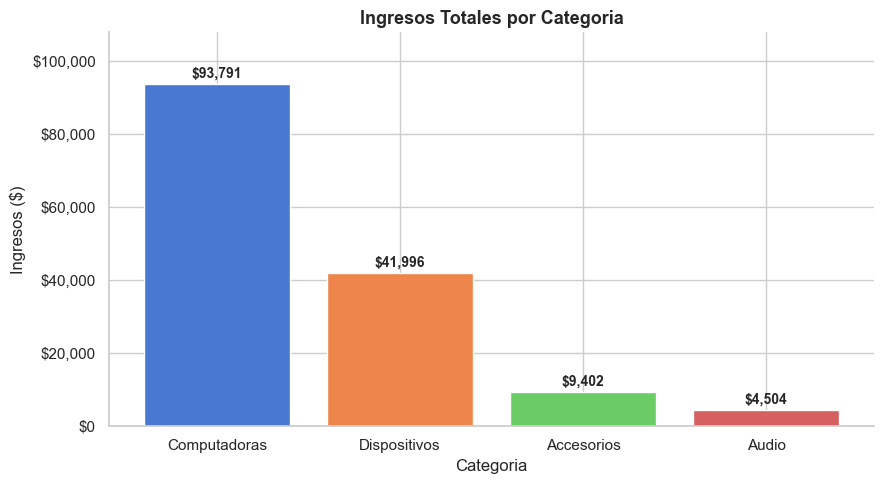

In [21]:
# Gráfica 1: Ingresos totales por categoría
categoria_data = df.groupby('categoria')['total'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(9,5))

# Dibujar barras
barras = ax.bar(
    categoria_data.index,
    categoria_data.values,
    color=sns.color_palette('muted', len(categoria_data)),
    edgecolor='white'
)

# Añadir etiquetas encima de cada barra
for barra in barras:
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        barra.get_height() + 800,
        f'${barra.get_height():,.0f}',
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

ax.set_title('Ingresos Totales por Categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Ingresos ($)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.set_ylim(0, categoria_data.max() * 1.15)

sns.despine()
plt.tight_layout()
plt.show()


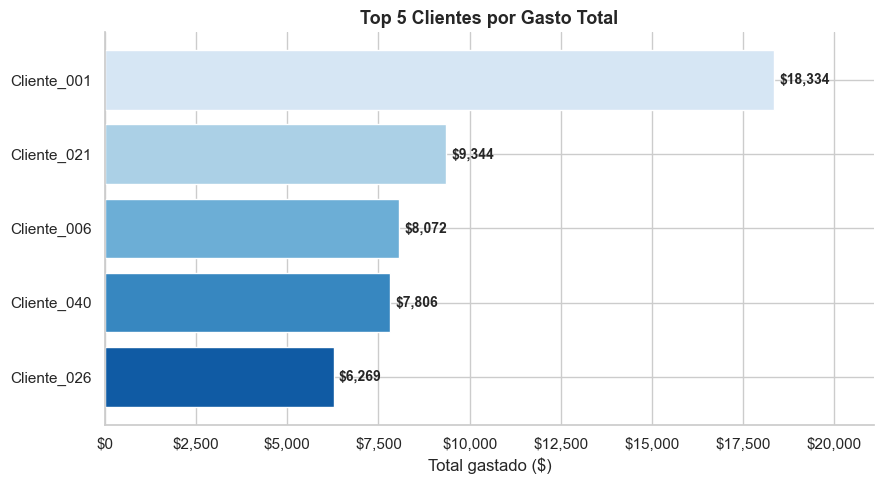

In [22]:
#Grafica 2: Top 5 clientes x gasto total
top5 = df.groupby('cliente')['total'].sum().nlargest(5).sort_values()

fig, ax = plt.subplots(figsize=(9, 5))
barras = ax.barh(
    top5.index, top5.values,
    color=sns.color_palette('Blues_r', len(top5)),
    edgecolor='white'
)

for barra in barras:
    ax.text(
        barra.get_width() + 150,
        barra.get_y() + barra.get_height() / 2,
        f'${barra.get_width():,.0f}',
        va='center', fontsize=10, fontweight='bold'
    )

ax.set_title('Top 5 Clientes por Gasto Total')
ax.set_xlabel('Total gastado ($)')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.set_xlim(0, top5.max() * 1.15)
sns.despine()
plt.tight_layout()
plt.show()

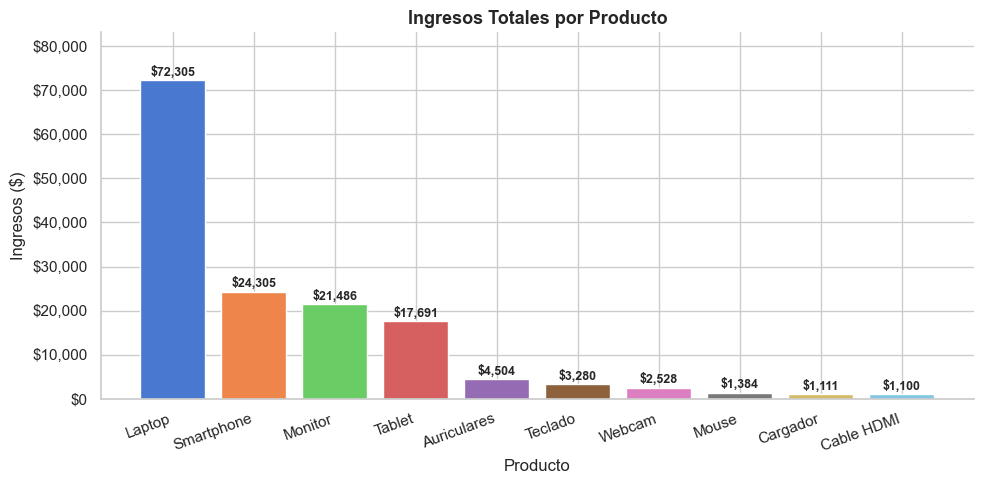

In [23]:
# Gráfica 3: Ingresos por producto
producto_data = df.groupby('producto')['total'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
colors = sns.color_palette('muted', len(producto_data))
barras = ax.bar(producto_data.index, producto_data.values, color=colors, edgecolor='white')

for barra in barras:
    ax.text(
        barra.get_x() + barra.get_width() / 2,
        barra.get_height() + 300,
        f'${barra.get_height():,.0f}',
        ha='center', va='bottom', fontsize=9, fontweight='bold'
    )

ax.set_title('Ingresos Totales por Producto')
ax.set_xlabel('Producto')
ax.set_ylabel('Ingresos ($)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.set_ylim(0, producto_data.max() * 1.15)
plt.xticks(rotation=20, ha='right')
sns.despine()
plt.tight_layout()
plt.show()

## 5. Conclusiones

## Resumen ejecutivo
El análisis del dataset revela los siguientes hallazgos principales:        

## Ingresos y Volumen  
Las ventas totales son de: B/.159,274.50, con un ticket promedio de: B/.829.55 por venta.       
Noviembre fue el mes con mejores ganancias (B/.81,900.00), casi el doble que los meses de octubre y diciembre, lo que puede relacionarse con campañas del Black Friday.

### Productos y categoría
La categoria Computadora concentra el mayor ingreso, impulsada principalmente por el producto Laptop, que lidera tanto en unidades vendidas y en ingresos totales.
Las categorias de Accesorios y Audio a pesar de tener mayor número de transacciones individuales, tiene un peso marginal en los ingresos totales por su bajo precio unitario.

### Clientes y Geografía       
La ciudad de Barcelona tiene el mayor ingreso por ciudad (B/.31,855.00) seguido por la ciudad de Zaragoza (B/.26,733.00).
Los top 5 clientes concentran una parte significativa de las ganancias, con el cliente 001 destacando sobre el resto, con gastos de B/.18,334.00, casi el doble que el segundo cliente que más gasto.

## Recomendaciones     
**1. Fidelizar a los clientes de alto valor:** El top 5 representa una porción desproporcionada de los ingresos. Programas de fidelización o atención preferencial podrian evitar fuga de clientes.      
**2. Investigar el pico de Noviembre:** Si está ligado a Black Friday, planificar stock y logística con antelación para maximizar la conversión el proximo año.     
**3. Mejorar la captura de datos:** un 10% de los datos geográficos contenian Nulos, lo cual limita el análisis geográfico.   

